 ### ANALYSIS OF THE PLAYERS DATASET 

# Data analysis from players,players valuations and clubs datasets 
The first cell is just to set folder path and library used

In [2]:
import pandas as pd
import seaborn as sns 
import geopandas as gpd
import matplotlib.pyplot as plt
# import plotly.express as px

folder_path = '../assets/Assignment_Data_2023-2024/Assignment_Data_2023-2024/'
players_df = pd.read_csv(folder_path+'players.csv')
club_df = pd.read_csv(folder_path+'clubs.csv')
appereances_df = pd.read_csv(folder_path+'appearances.csv')
players_valuations_df = pd.read_csv(folder_path+'player_valuations.csv')
players_valuations_df_nona = players_valuations_df.dropna()
players_df_nona = players_df.dropna()

# Value of the players correlated to their position 
Distribution of market value of players depending on their position
We can see 1 point in the Attack column that we can consider an outlier because it is out of the usual bounds 

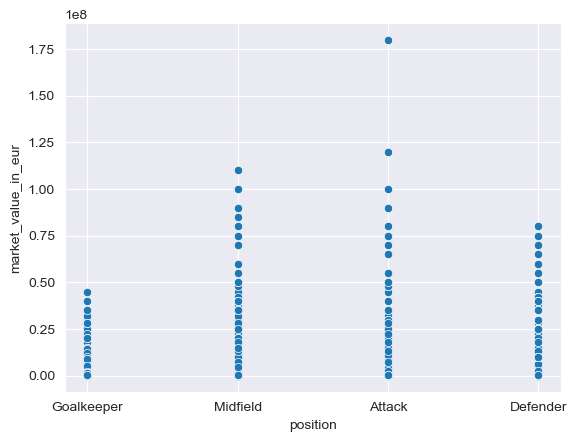

In [3]:
sns.scatterplot(x='position', y='market_value_in_eur', data=players_df_nona)
plt.show(); 

# Analysis of the outlier in the Attack column
Finding who is the player that has the highest market value in the Attack position
that create the outlier in the graph above,just by searcing the highest value in the column

In [4]:
players_df_nona[players_df_nona['market_value_in_eur'] == players_df_nona['market_value_in_eur'].max()]


,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
12249,418560,Erling,Haaland,Erling Haaland,2023,281,erling-haaland,England,Leeds,Norway,...,left,195.0,180000000.0,180000000.0,2027-06-30 00:00:00,Rafaela Pimenta,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erling-haaland...,GB1,Manchester City


As we can see Erling Haaland is the player with the highest market value in the attack position, and also in all the players provided by the dataset
his value is way higher than the other players provided by the dataset

## Analysis of the amount of players in each position
We can use a pychart to see the amount of players in each position

In [ ]:
plt.pie(players_df_nona['position'].value_counts(), labels=players_df_nona['position'].value_counts().index,autopct='')
plt.show()

# Grouping by team lineups 

In [ ]:
players_df['full_name'] = players_df['first_name'] + ' ' + players_df['last_name']
players_df[['full_name','current_club_name']]
# group by team lineups
team_lineups = players_df.groupby('current_club_name')['full_name'].apply(list)
team_lineups


# Top 10 players with the highest market value in the world

In [ ]:

players_df['full_name'] = players_df['first_name'] + ' ' + players_df['last_name']
player_df_sorted = players_df.sort_values(by='highest_market_value_in_eur', ascending=False).head(10)
top_10_players = player_df_sorted.head(10)
player_df_sorted = player_df_sorted.iloc[::-1]
'''
fig = px.scatter(player_df_sorted, x="highest_market_value_in_eur", y="full_name",orientation='v')
fig.show()
'''

sns.set_theme(style="darkgrid")
sns.scatterplot(x='highest_market_value_in_eur', y='full_name', data=top_10_players)

# We are showing on that map the country of origin of the player (in dataset)
using geopandas lib to show 

In [ ]:

# Get counts of players per country
player_counts = players_df["country_of_birth"].value_counts()

# Create a new DataFrame with country names and player counts
player_counts_df = pd.DataFrame({
    'name': player_counts.index,
    'player_count': player_counts.values
})

# Merge world DataFrame with player counts
world = world.merge(player_counts_df, how="left", on="name")

# Replace NaN values with 0 (countries with no players)
world['player_count'].fillna(0, inplace=True)

# Plot the world map with player counts
fig, ax = plt.subplots(1, 1)
world.plot(column='player_count', 
           cmap='YlOrRd', 
           linewidth=0.8, 
           ax=ax, 
           edgecolor='0.8', 
           legend=True, 
           legend_kwds={'label': "Player Count", 'orientation': "horizontal"})
plt.show()

# Data analysis how the must valued player take value in the market during the time

In [ ]:

merged_df = players_valuations_df.merge(players_df[['player_id', 'first_name', 'last_name']], on='player_id')

max_market_player = merged_df.loc[merged_df['market_value_in_eur'].idxmax()]

player_valuation_df = merged_df[merged_df['player_id'] == max_market_player['player_id']]

plt.plot(player_valuation_df['datetime'], player_valuation_df['market_value_in_eur'])
plt.title('Market Value Over Time for {} {}'.format(max_market_player['first_name'], max_market_player['last_name']))
plt.xlabel('Date')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.show()

# Data analysis how the less valued player take value in the market during the time

In [ ]:

merged_df = players_valuations_df.merge(players_df[['player_id', 'first_name', 'last_name']], on='player_id')

max_market_player = merged_df.loc[merged_df['market_value_in_eur'].idxmin()]

player_valuation_df = merged_df[merged_df['player_id'] == max_market_player['player_id']]

plt.plot(player_valuation_df['datetime'], player_valuation_df['market_value_in_eur'])
plt.title('Market Value Over Time for {} {}'.format(max_market_player['first_name'], max_market_player['last_name']))
plt.xlabel('Date')
plt.ylabel('Market Value in EUR')
plt.xticks(rotation=45)
plt.show()

# Data analysis players with the highest yellow cards gruoped by country of birth

In [ ]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display
m = folium.Map(location=[0, 0], zoom_start=2)
merged_play_app_df = players_df.merge(appereances_df, on='player_id')
world = gpd.read_file("/Users/popper/Documents/Uni/Terzo_anno /TWEB/Progettto/Eleonora_Francesco_Riccardo/Data_Analysis/src/ne_110m_admin_0_countries")
total_yellow_cards = merged_play_app_df.groupby( "country_of_birth")['yellow_cards'].sum().reset_index()      
merged_play_app_df = players_df.merge(appereances_df, on='player_id')

# Sommare i cartellini gialli per ogni giocatore raggruppati per country_of_birth
total_yellow_cards = merged_play_app_df.groupby("country_of_birth")['yellow_cards'].sum().reset_index()

# Caricare il file shapefile dei paesi del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

# Unire i dati dei cartellini gialli con le geometrie dei paesi
world = world.merge(total_yellow_cards, how="left", left_on="name", right_on="country_of_birth")

# Impostare i valori NaN a 0
world['yellow_cards'].fillna(0, inplace=True)

# Creare la mappa
m = folium.Map(location=[0, 0], zoom_start=2)

# Aggiungere i poligoni dei paesi alla mappa con un colore basato sui cartellini gialli
folium.Choropleth(
    geo_data=world,
    data=world,
    columns=['name', 'yellow_cards'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Yellow Cards'
).add_to(m)

# Aggiungere un titolo alla mappa
title_html = '<h3 align="center" style="font-size:20px"><b>Countries by Number of Players with Yellow Cards</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Visualizzare la mappa
display(m)

In [ ]:

# Data analysis players with the highest red cards gruoped by country of birth

In [ ]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display
m = folium.Map(location=[0, 0], zoom_start=2)
merged_play_app_df = players_df.merge(appereances_df, on='player_id')
world = gpd.read_file("/Users/popper/Documents/Uni/Terzo_anno /TWEB/Progettto/Eleonora_Francesco_Riccardo/Data_Analysis/src/ne_110m_admin_0_countries")
total_red_cards = merged_play_app_df.groupby( "country_of_birth")['red_cards'].sum().reset_index()      
merged_play_app_df = players_df.merge(appereances_df, on='player_id')

# Sommare i cartellini gialli per ogni giocatore raggruppati per country_of_birth
total_red_cards = merged_play_app_df.groupby("country_of_birth")['red_cards'].sum().reset_index()

# Caricare il file shapefile dei paesi del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

# Unire i dati dei cartellini gialli con le geometrie dei paesi
world = world.merge(total_red_cards, how="left", left_on="name", right_on="country_of_birth")

# Impostare i valori NaN a 0
world['red_cards'].fillna(0, inplace=True)

# Creare la mappa
m = folium.Map(location=[0, 0], zoom_start=2)

# Aggiungere i poligoni dei paesi alla mappa con un colore basato sui cartellini gialli
folium.Choropleth(
    geo_data=world,
    data=world,
    columns=['name', 'red_cards'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Red Cards'
).add_to(m)

# Aggiungere un titolo alla mappa
title_html = '<h3 align="center" style="font-size:20px"><b>Countries  by Number of Players with Red Cards</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Visualizzare la mappa
display(m)

# Data analysis means of players in the last appereances gruped by country of birth

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from IPython.display import display

# Unire i due DataFrame sui campi ID
joined_df = players_df.merge(appereances_df, on='player_id')

# Assicurarsi che la colonna delle date sia in formato datetime
joined_df['date'] = pd.to_datetime(joined_df['date'])
joined_df['date_of_birth'] = pd.to_datetime(joined_df['date_of_birth'])

# Trovare la data più recente per ogni ID
latest_appearance_df = joined_df.loc[joined_df.groupby('player_id')['date'].idxmax()]

# Calcolare l'età al momento dell'ultima apparizione
latest_appearance_df['age_at_last_appearance'] = (latest_appearance_df['date'] - latest_appearance_df['date_of_birth']).dt.days // 365

# Calcolare la media delle età per nazione di nascita
average_age_by_country = latest_appearance_df.groupby('country_of_birth')['age_at_last_appearance'].mean().reset_index()

# Caricare i dati geografici del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

# Unire i dati geografici con la media delle età per nazione di nascita
world = world.merge(average_age_by_country, how="left", left_on="name", right_on="country_of_birth")

# Impostare i valori NaN a 0
world['age_at_last_appearance'].fillna(0, inplace=True)

# Creare la mappa
m = folium.Map(location=[0, 0], zoom_start=2)

# Aggiungere i poligoni dei paesi alla mappa con un colore basato sulla media delle età
choropleth = folium.Choropleth(
    geo_data=world,
    data=world,
    columns=['name', 'age_at_last_appearance'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Età media dei giocatori all\'ultima apparizione'
).add_to(m)

# Aggiungere un titolo alla mappa
title_html = '<h3 align="center" style="font-size:20px"><b>Età media dei giocatori all\'ultima apparizione per nazione di nascita</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Visualizzare la mappa
display(m)


# Data analysis of the players with players with the highest market value in the world pre covid pandemic

### (per ora in italiano per rendere l'idea) Le seguenti analisi riguarda il valore di mercato dei giocatori nel periodo successivo alla pandemia di COVID-19 avvenuta nel 2020 ,l'analisi nasce dalla curiosità di capire come il valore di mercato dei giocatori sia cambiato dopo la pandemia di COVID-19, per fare ciò si è deciso di prendere in considerazione i dati relativi al 2021 e al 2022, in quanto la pandemia ha avuto inizio nel 2020 e si è protratta per un lungo periodo di tempo, influenzando anche il mercato del calcio. 

In [4]:
# Import necessary libraries
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
import pandas as pd

# Initialize notebook mode
init_notebook_mode(connected=True)

# Assumendo che players_valuations_df e players_df siano già caricati
merged_df = players_valuations_df.merge(players_df[['player_id', 'first_name', 'last_name']], on='player_id')

max_market_player = merged_df.loc[merged_df['market_value_in_eur'].idxmax()]

# Valutazioni pre-covid
player_valuation_pre_covid_df = merged_df[merged_df['player_id'] == max_market_player['player_id']]
player_valuation_pre_covid_df = player_valuation_pre_covid_df[(player_valuation_pre_covid_df['datetime'] > '2017-01-01') & (player_valuation_pre_covid_df['datetime'] < '2020-01-01')]


# Converti la colonna 'datetime' in formato datetime
player_valuation_pre_covid_df['datetime'] = pd.to_datetime(player_valuation_pre_covid_df['datetime'])

# Crea una colonna 'date' con solo la data (senza il tempo)
player_valuation_pre_covid_df['date'] = player_valuation_pre_covid_df['datetime'].dt.date

# Ordina il dataframe per data
player_valuation_pre_covid_df = player_valuation_pre_covid_df.sort_values(by='date')

# Create figure
fig = go.Figure()

# Make frames
frames = [go.Frame(data=[go.Scatter(x=player_valuation_pre_covid_df[player_valuation_pre_covid_df['date'] <= date]['date'],
                                    y=player_valuation_pre_covid_df[player_valuation_pre_covid_df['date'] <= date]['market_value_in_eur'],
                                    mode='lines+markers')],
                   name=str(date)) for date in player_valuation_pre_covid_df['date'].unique()]

# Add traces
fig.add_trace(go.Scatter(x=player_valuation_pre_covid_df['date'], y=player_valuation_pre_covid_df['market_value_in_eur'],
                         mode='lines+markers', line=dict(color='blue')))

fig.frames = frames

# Add sliders and buttons
fig.update_layout(
    title='Market Value of {} 3 years before covid-19'.format(max_market_player['first_name'] + ' ' + max_market_player['last_name']) ,
    xaxis_title='Date',
    yaxis_title='Market Value in EUR',
    updatemenus=[{
        'buttons': [
            {'label': 'Play',
             'method': 'animate',
             'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]},
            {'label': 'Pause',
             'method': 'animate',
             'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}]}
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }],
    sliders=[{
        'steps': [{'args': [[str(date)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}],
                   'label': str(date),
                   'method': 'animate'} for date in player_valuation_pre_covid_df['date'].unique()],
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Date:',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 300},
        'x': 0.1,
        'len': 0.9,
        'y': 0,
        'pad': {'b': 10, 't': 50}
    }]
)

fig.show()



NameError: name 'players_valuations_df' is not defined

# Data analysis of the players with the highest market value in the world during covid pandemic years

In [3]:
## Import necessary libraries
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
import pandas as pd

# Initialize notebook mode
init_notebook_mode(connected=True)

# Assumendo che players_valuations_df e players_df siano già caricati
merged_df = players_valuations_df.merge(players_df[['player_id', 'first_name', 'last_name']], on='player_id')

max_market_player = merged_df.loc[merged_df['market_value_in_eur'].idxmax()]

# Valutazioni durante il periodo COVID-19
player_valuation_during_covid_df = merged_df[merged_df['player_id'] == max_market_player['player_id']]
player_valuation_during_covid_df = player_valuation_during_covid_df[(player_valuation_during_covid_df['datetime'] > '2020-01-01') & (player_valuation_during_covid_df['datetime'] < '2023-01-01')]

# Converti la colonna 'datetime' in formato datetime
player_valuation_during_covid_df['datetime'] = pd.to_datetime(player_valuation_during_covid_df['datetime'])

# Crea una colonna 'date' con solo la data (senza il tempo)
player_valuation_during_covid_df['date'] = player_valuation_during_covid_df['datetime'].dt.date

# Ordina il dataframe per data
player_valuation_during_covid_df = player_valuation_during_covid_df.sort_values(by='date')

# Create figure
fig = go.Figure()

# Make frames
frames = [go.Frame(data=[go.Scatter(x=player_valuation_during_covid_df[player_valuation_during_covid_df['date'] <= date]['date'],
                                    y=player_valuation_during_covid_df[player_valuation_during_covid_df['date'] <= date]['market_value_in_eur'],
                                    mode='lines+markers')],
                   name=str(date)) for date in player_valuation_during_covid_df['date'].unique()]

# Add traces
fig.add_trace(go.Scatter(x=player_valuation_during_covid_df['date'], y=player_valuation_during_covid_df['market_value_in_eur'],
                         mode='lines+markers', line=dict(color='blue')))

fig.frames = frames

# Add sliders and buttons
fig.update_layout(
    title='Market Value of {} during covid-19 pandemic'.format(max_market_player['first_name'] + ' ' + max_market_player['last_name']) ,
    xaxis_title='Date',
    yaxis_title='Market Value in EUR',
    updatemenus=[{
        'buttons': [
            {'label': 'Play',
             'method': 'animate',
             'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]},
            {'label': 'Pause',
             'method': 'animate',
             'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}]}
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }],
    sliders=[{
        'steps': [{'args': [[str(date)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}],
                   'label': str(date),
                   'method': 'animate'} for date in player_valuation_during_covid_df['date'].unique()],
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Date:',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 16},
        'x': 0.1,
        'len': 0.9,
        'y': 0,
        'pad': {'b': 10, 't': 50}
    }]
)

fig.show()




NameError: name 'players_valuations_df' is not defined

# Data analysis of the players with the highest market value in the world  covid pandemic years

# Data analysis of how Covid pandemic has affected the market value of the players in the world 

La seguente analisi punta nel capire come la pandemia di COVID-19 abbia influenzato il valore di mercato dei giocatori di calcio nel mondo, paragonando il loro valore di mercato precedente al 2020 e comprendendo quando in media un giocatore ha perso / acquisito durante il periodo di pandemia 

#Data analysis of the top 10 players with the highest market value in the world before the covid pandemic
